In [146]:
import matplotlib.pyplot as plt

import numpy as np

from scipy import ndimage
import scipy.stats as stats

from matplotlib.patches import FancyArrowPatch
from matplotlib.transforms import Affine2D


plt.rcParams['text.usetex'] = False

In [2]:
scale = 1000

num_steps = 10000

num_accumulators = 2

v_true = 2.0 / scale
v_false = 1.0 / scale

s_true = 1.5 / np.sqrt(scale)
s_false = 1.0 / np.sqrt(scale)

b = 2.0

t0 = 100

A = 0.4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-6.69492e-17..1.0].


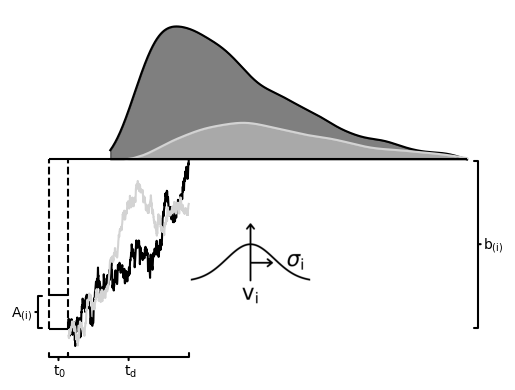

In [182]:
rng = np.random.default_rng(3)

X = np.cumsum(rng.normal(loc=[v_true, v_false], scale=[s_true,s_false], size=(num_steps, num_accumulators)), axis=0)

max_steps = np.where(X >= b)[0].min()

X = X[:max_steps, :]

t = np.arange(max_steps)

mu = b / np.array([v_true, v_false])
lam = (b / np.array([s_true, s_false])) ** 2

num_obs = 10000

# First passage time
fpt = np.zeros((num_accumulators, num_obs))

for i in range(num_accumulators):
    fpt[i, :] = rng.wald(mu[i], lam[i], size=num_obs)

max_rt = 2000

resp = fpt.argmin(axis=0)
rt = fpt.min(axis=0) + t0
resp = resp[rt < max_rt]
rt = rt[rt < max_rt]

rt_true = rt[resp == 0]
rt_false = rt[resp == 1]

rt_true.sort()
rt_false.sort()

kernel_true = stats.gaussian_kde(rt_true)
kernel_false = stats.gaussian_kde(rt_false)

dens_true = kernel_true(rt_true)
dens_true = (dens_true - dens_true.min()) / (dens_true.max() - dens_true.min()) * b * (resp == 0).mean() + b
dens_false = kernel_false(rt_false)
dens_false = (dens_false - dens_false.min()) / (dens_false.max() - dens_false.min()) * b * (resp == 1).mean() + b

fig, ax = plt.subplots(1, 1)

color_dict = {
    0: "black",
    1: "lightgrey"
}

for i in range(num_accumulators):
    ax.plot(t, X[:, i], color=color_dict[i])

ax.hlines(0, xmin=-t0, xmax=0, colors="black")

ax.vlines(0, ymin=0, ymax=2, linestyles="--", colors="black")
ax.vlines(-t0, ymin=0, ymax=2, linestyles="--", colors="black")

ax.hlines(A, xmin=-t0, xmax=0, colors="black")

# ax.vlines(max_rt, ymin=0, ymax=2, linestyles="-", colors="black")

ax.plot(rt_true, dens_true, color=color_dict[0])
ax.fill_between(rt_true, dens_true, b, color=color_dict[0], alpha=0.5)
ax.plot(rt_false, dens_false, color=color_dict[1])
ax.fill_between(rt_false, dens_false, b, color=color_dict[1], alpha=0.5)

ax.hlines(b, xmin=-t0, xmax=max_rt, colors="black")

ax.add_patch(FancyArrowPatch((max_rt + 80, 1), (max_rt + 40, 1), arrowstyle='-[, widthB=60.0, lengthB=3', lw=1.5, color='k'))
ax.text(max_rt + 80, 0.95, r"$\text{b}_{\text{(i)}}$")

ax.add_patch(FancyArrowPatch((0 - t0/2,-0.4), (0 - t0/2, -0.3), arrowstyle='-[, widthB=7.0, lengthB=3', lw=1.5, color='k'))
ax.text(0 - t0/2 - 25, -0.55, r"$\text{t}_0$")

ax.add_patch(FancyArrowPatch((t.max()/2, -0.4), (t.max()/2, -0.3), arrowstyle='-[, widthB=43.5, lengthB=3', lw=1.5, color='k'))
ax.text(t.max()/2 - 25, -0.55, r"$\text{t}_{\text{d}}$")

ax.add_patch(FancyArrowPatch((-t0 - 80, A/2), (-t0 - 40, A/2), arrowstyle='-[, widthB=11.5, lengthB=3', lw=1.5, color='k'))
ax.text(-t0 - 190, A/2 - 0.05, r"$\text{A}_{\text{(i)}}$")

# ax.add_patch(FancyArrowPatch((t.max(), 0.5), (t.max() + 200, 1.5), arrowstyle='->, head_width=4, head_length=10', lw=1.5, color='k'))

ax.set_axis_off()

mini_ax = fig.add_axes([0.4, 0.25, 0.2, 0.2])

mini_ax.imshow(ndimage.rotate(plt.imread("norm_dist.png"), 0), cmap="gray")

mini_ax.set_axis_off()

# plt.tight_layout()

plt.show()

fig.savefig("rdm_schema.png", dpi=900)

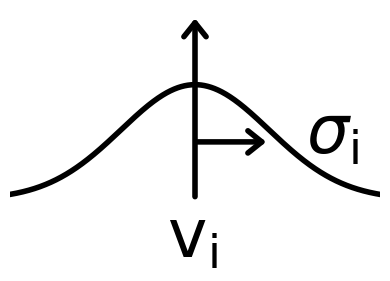

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.transforms import Affine2D

# Create the figure and axes
fig, ax = plt.subplots(figsize=(4, 3))

# Generate x values on a standard scale
x_std = np.linspace(-1, 1, 1000)
y_std = norm.pdf(x_std, scale = 0.4)

# Plot the rotated normal distribution
ax.plot(x_std, y_std, '-', linewidth=4, color="k")

ax.add_patch(FancyArrowPatch((0, 0), (0, y_std.max() + 0.6), arrowstyle='->, head_width=8, head_length=10', lw=4, color='k'))

ax.text(-0.15, -0.5, r"$\text{v}_{\text{i}}$", size = 48)

ax.add_patch(FancyArrowPatch((0, 0.5), (0.4, 0.5), arrowstyle='->, head_width=8, head_length=10', lw=4, color='k'))

ax.text(0.6, 0.4, r"$\sigma_{\text{i}}$", size = 48)

ax.set_xlim(-1, 1)

ax.set_axis_off()

plt.tight_layout()
plt.show()

fig.savefig("norm_dist.png")